#### Post pruning decision trees with cost complexity pruning

- The DecisionTreeClassifier provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. 

- Cost complexity pruning provides another option to control the size of a tree. 

- In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 

- Greater values of ccp_alpha increase the number of nodes pruned. 

- Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
clf = DecisionTreeClassifier(random_state=0)

In [4]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [5]:
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [7]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352]))

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

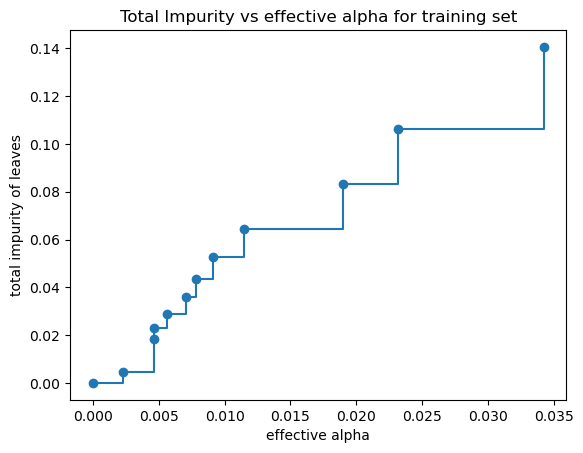

In [8]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

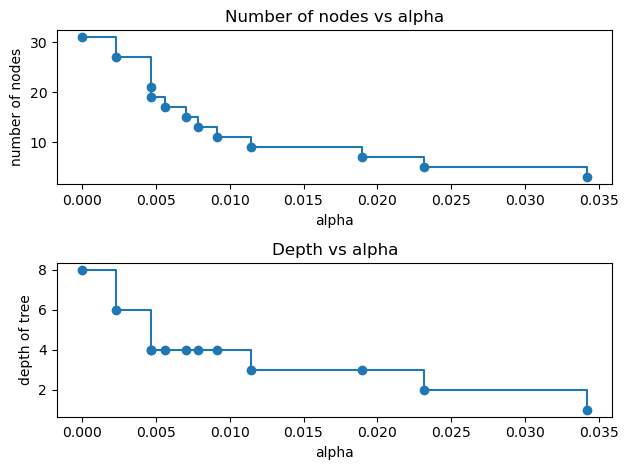

In [10]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

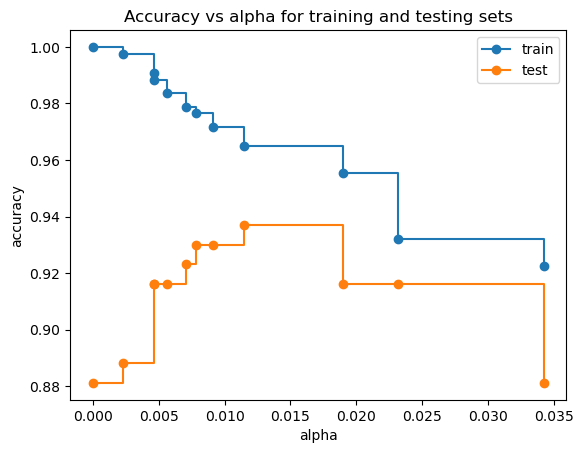

In [11]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()